Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Netflix

Read in Data

In [2]:
netflix = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Distribution of Titles

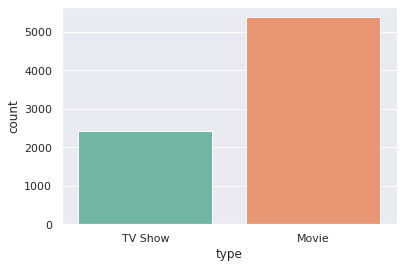

In [3]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix, palette="Set2")

Content Rating

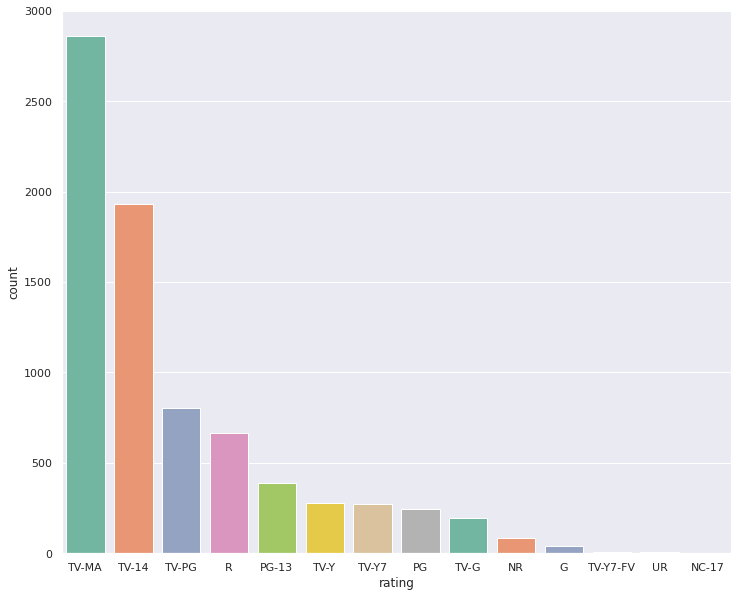

In [4]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix, palette="Set2", order=netflix['rating'].value_counts().index[0:15])

# IMDB

In [5]:
imdb_ratings=pd.read_csv('../input/imdb-extensive-dataset/IMDb ratings.csv',usecols=['mean_vote', 'total_votes'])
imdb_titles=pd.read_csv('../input/imdb-extensive-dataset/IMDb movies.csv', usecols=['title','year','genre'])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Merging IMDB with Netflix

In [6]:
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.mean_vote,
                    'Genre':imdb_titles.genre,
                        'Votes': imdb_ratings.total_votes})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.dropna()
df=ratings.merge(netflix,left_on='Title',right_on='title',how='inner')
df=df.sort_values(by='Rating', ascending=False)
df = df.reset_index(drop=True)
df.head(5)

,Title,Release Year,Rating,Genre,Votes,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Game,2006,9.5,Thriller,1081,s2340,Movie,Game,Abhinay Deo,"Abhishek Bachchan, Kangana Ranaut, Anupam Kher...",India,"December 15, 2019",2011,TV-14,135 min,"International Movies, Thrillers",A tycoon accuses three strangers of killing hi...
1,Innocent,2017,9.3,Comedy,684,s3009,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
2,Surga Yang Tak Dirindukan,2015,9.1,"Drama, Romance",2135,s5920,Movie,Surga Yang Tak Dirindukan,Kuntz Agus,"Fedi Nuril, Laudya Cynthia Bella, Raline Shah,...",Indonesia,"January 28, 2019",2015,TV-14,121 min,"Dramas, Faith & Spirituality, International Mo...",After saving an unwed expectant mother who's i...
3,Silencer,2020,9.1,Drama,466,s5605,Movie,Silencer,Timothy Woodward Jr.,"Johnny Messner, Danny Trejo, Tito Ortiz, Chuck...",United States,"December 3, 2018",2018,TV-MA,88 min,"Action & Adventure, Independent Movies",When a drug lord kidnaps his girlfriend’s daug...
4,Merku Thodarchi Malai,2018,9.0,Drama,1538,s4046,Movie,Merku Thodarchi Malai,Lenin Bharathi,"Antony, Gayathri Krishna, Abu Valayamkulam, An...",India,"January 1, 2019",2018,TV-MA,115 min,"Dramas, Independent Movies, International Movies","In southern India, a laborer's dreams of ownin..."


Dropping irrelevant columns

In [7]:
df.columns

Index(['Title', 'Release Year', 'Rating', 'Genre', 'Votes', 'show_id', 'type',
       'title', 'director', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.drop(axis=1, columns=["duration", "Genre","show_id","title","country", "date_added","release_year"], inplace=True)

In [9]:
df = df.rename(columns={'type': 'Type', 
                        'director': 'Director',
                        'cast': 'Cast',
                        'rating': 'Content Rating',
                        'listed_in': 'Genre',
                        'description': 'Synopsis'})

In [10]:
df.head()

,Title,Release Year,Rating,Votes,Type,Director,Cast,Content Rating,Genre,Synopsis
0,Game,2006,9.5,1081,Movie,Abhinay Deo,"Abhishek Bachchan, Kangana Ranaut, Anupam Kher...",TV-14,"International Movies, Thrillers",A tycoon accuses three strangers of killing hi...
1,Innocent,2017,9.3,684,TV Show,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",TV-MA,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
2,Surga Yang Tak Dirindukan,2015,9.1,2135,Movie,Kuntz Agus,"Fedi Nuril, Laudya Cynthia Bella, Raline Shah,...",TV-14,"Dramas, Faith & Spirituality, International Mo...",After saving an unwed expectant mother who's i...
3,Silencer,2020,9.1,466,Movie,Timothy Woodward Jr.,"Johnny Messner, Danny Trejo, Tito Ortiz, Chuck...",TV-MA,"Action & Adventure, Independent Movies",When a drug lord kidnaps his girlfriend’s daug...
4,Merku Thodarchi Malai,2018,9.0,1538,Movie,Lenin Bharathi,"Antony, Gayathri Krishna, Abu Valayamkulam, An...",TV-MA,"Dramas, Independent Movies, International Movies","In southern India, a laborer's dreams of ownin..."


# About Genre Recommenders

- IMDB ratings are casted by voters
- We need to create a top Netflix titles  list which contains a weighted average score that takes into account 
    - the number of votes each title receives 
    - minimum votes required to be in the list
    - the mean vote for all titles

In [11]:
#average rating of a movie present in this dataset is around 6.243
C= df['Rating'].mean()
print(C)

6.243494152046763


In [12]:
#The nest step is to determine the number of vote count required for a particular movie to reflect on the top. 
#For this we shall set the crtieria at 50% and find the total vote counts of the movies which are above 50%
# A movie needs to have 1578 votes to be in the 50th percentile
m= df['Votes'].quantile(0.5)
print(m)

1578.0


In [13]:
#filter out movies that are in the 50th percentile
#there are 1368 titles that fulfill this condition
q_movies = df.copy().loc[df['Votes'] >= m]
q_movies.shape

(1368, 10)

Create a weighted rating (WR) where,

v is the Vote_count of a movie;
m is the minimum votes required to be listed in the top chart;
R is the average rating of the movie; And
C is the mean vote across the whole report

In [14]:
def weightedrating(x,m=m,C=C):
    
    v = x['Votes']
    R = x['Rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [15]:
df['Weighted Score'] = df.apply(weightedrating, axis=1)

In [16]:
df=df.sort_values('Weighted Score', ascending=False, )

In [17]:
df = df.reset_index(drop=True)

In [18]:
df.head(3)

,Title,Release Year,Rating,Votes,Type,Director,Cast,Content Rating,Genre,Synopsis,Weighted Score
0,Waar,2013,9.0,29323,Movie,Bilal Lashari,"Shaan Shahid, Shamoon Abbasi, Ayesha Khan, Mee...",TV-MA,"Action & Adventure, International Movies",When Pakistani authorities learn of a looming ...,8.859235
1,Inception,2010,8.7,2002816,Movie,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",PG-13,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru...",8.698066
2,Pulp Fiction,1994,8.7,1780147,Movie,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",R,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,8.697824


Now that we have a dataframe with qualified titles, let's build a simple recommender that returns top titles based on genres

In [19]:
def top_rated_wr(genre):
    select = df.loc[df['Genre'].str.contains(genre)]
    
    top_10 = select.sort_values(by='Weighted Score', ascending=False).head(10)
    
    plt.figure(figsize=(15,10))
    sns.barplot(data=top_10,y='Title', x='Weighted Score', dodge=False)
    plt.xlabel('Weighted Ratings', FontSize = 20)
    plt.ylabel(f'{genre} Titles', Fontsize=20)
    plt.title(f' Top 10 {genre} from Netflix')
    plt.show()

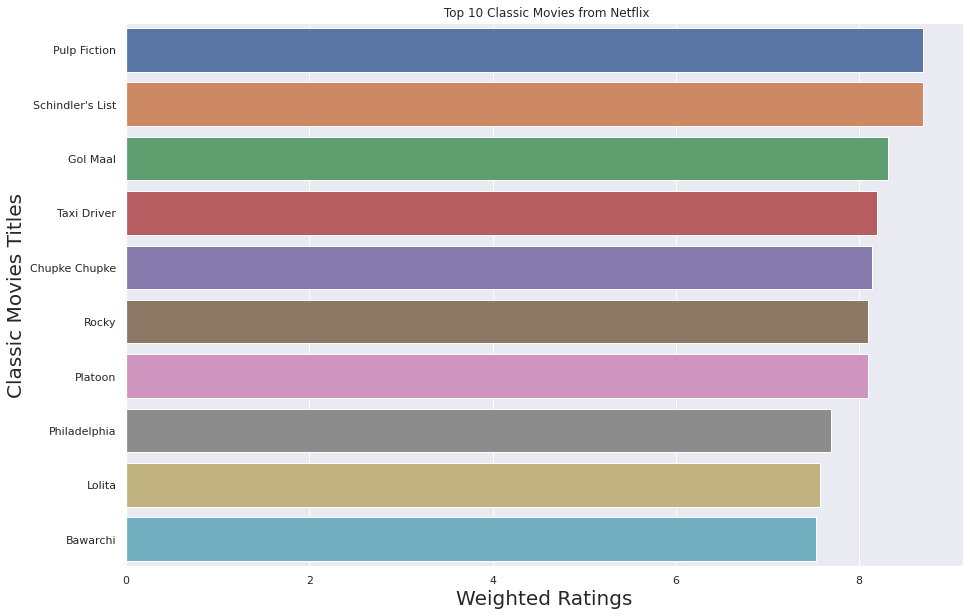

In [20]:
top_rated_wr("Classic Movies")

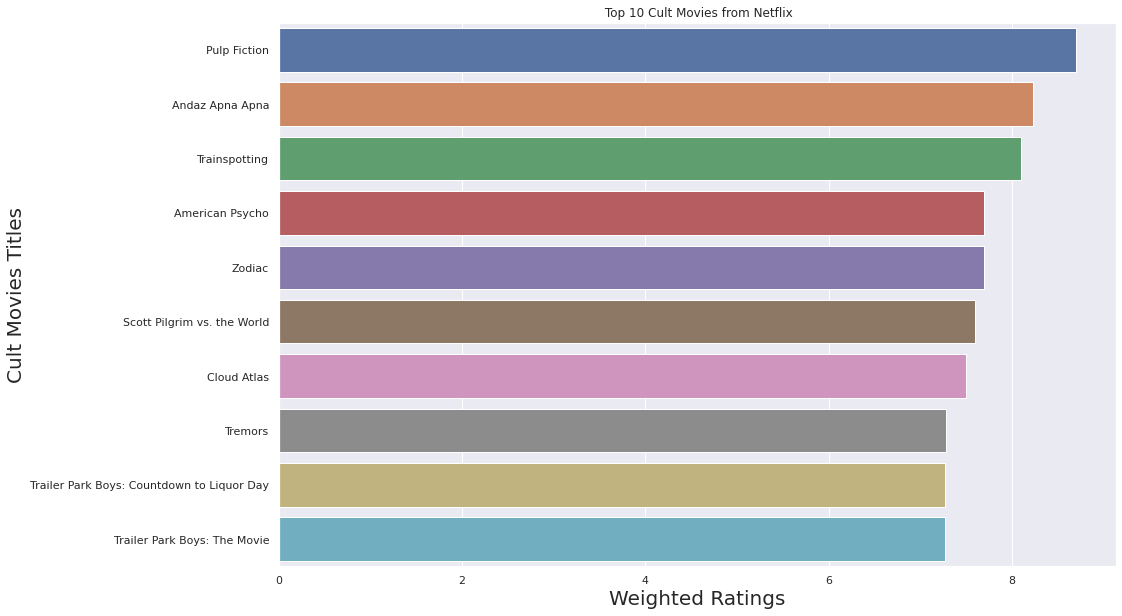

In [21]:
top_rated_wr("Cult Movies")

In [22]:
df.columns

Index(['Title', 'Release Year', 'Rating', 'Votes', 'Type', 'Director', 'Cast',
       'Content Rating', 'Genre', 'Synopsis', 'Weighted Score'],
      dtype='object')

In [23]:
def top_rated_table(genre):
    pd.set_option('display.max_colwidth', None)
    select = df.loc[df['Genre'].str.contains(genre)]
    df2 = select.sort_values(by='Weighted Score', ascending=False).head(10)[['Title', 'Release Year', 'Rating','Director','Genre', 'Synopsis']]
    return df2

In [24]:
top_rated_table("Classic Movies")

,Title,Release Year,Rating,Director,Genre,Synopsis
2,Pulp Fiction,1994,8.7,Quentin Tarantino,"Classic Movies, Cult Movies, Dramas","This stylized crime caper weaves together stories featuring a burger-loving hit man, his philosophical partner and a washed-up boxer."
3,Schindler's List,1993,8.7,Steven Spielberg,"Classic Movies, Dramas","Oskar Schindler becomes an unlikely humanitarian, spending his entire fortune to help save 1,100 Jews from Auschwitz during World War II."
17,Gol Maal,1979,8.5,Hrishikesh Mukherjee,"Classic Movies, Comedies, International Movies","When circumstances at work compel Ram to pretend to have a twin, his lie works – until the boss wants his daughter to marry Ram’s fictitious brother."
32,Taxi Driver,1976,8.2,Martin Scorsese,"Classic Movies, Dramas, Thrillers","Enraged by New York's moral rot and urban decay, an unhinged cab driver goes mad, plotting an assassination and saving a teen sex worker."
35,Chupke Chupke,1975,8.4,Hrishikesh Mukherjee,"Classic Movies, Comedies, International Movies","Jealous of the high regard in which his new wife holds their brother-in-law, a botany professor stages an elaborate prank that will even the score."
42,Rocky,1976,8.1,John G. Avildsen,"Action & Adventure, Classic Movies, Dramas","Sylvester Stallone shot to fame as Rocky Balboa, an unknown fighter who's given a shot at fighting world champ Apollo Creed as a publicity stunt."
44,Platoon,1986,8.1,Oliver Stone,"Action & Adventure, Classic Movies, Dramas",A soldier grows disillusioned as he's caught between rival sergeants in this semi-autobiographical Vietnam War drama from writer-director Oliver Stone.
118,Philadelphia,1993,7.7,Jonathan Demme,"Classic Movies, Dramas, LGBTQ Movies",Philadelphia attorney Andrew Beckett launches a wrongful termination suit against his law firm when they fire him because he's gay and HIV-positive.
157,Lolita,1962,7.6,Stanley Kubrick,"Classic Movies, Dramas, Romantic Movies","In this black comedy, an English professor marries his landlady to get closer to his forbidden obsession: her teenage daughter."
171,Bawarchi,1972,8.1,Hrishikesh Mukherjee,"Classic Movies, Comedies, Dramas",A dysfunctional middle-class family is transformed by the attentions of their talented new chef – until he vanishes along with their valuable jewels.


In [25]:
top_rated_table("Dramas")

,Title,Release Year,Rating,Director,Genre,Synopsis
2,Pulp Fiction,1994,8.7,Quentin Tarantino,"Classic Movies, Cult Movies, Dramas","This stylized crime caper weaves together stories featuring a burger-loving hit man, his philosophical partner and a washed-up boxer."
3,Schindler's List,1993,8.7,Steven Spielberg,"Classic Movies, Dramas","Oskar Schindler becomes an unlikely humanitarian, spending his entire fortune to help save 1,100 Jews from Auschwitz during World War II."
4,American History X,1998,8.5,Tony Kaye,Dramas,A neo-Nazi gets sent to prison for murder and comes out a changed man. But can he prevent his younger brother from following in his footsteps?
7,City of God,2002,8.5,"Fernando Meirelles, Katia Lund","Dramas, Independent Movies, International Movies","Growing up in a Rio de Janeiro slum, Rocket is able to avoid being drawn into a life of drugs and crime by having a passion for photography."
8,3 Idiots,2009,8.5,Rajkumar Hirani,"Comedies, Dramas, International Movies","While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."
9,Andhadhun,2018,8.5,Sriram Raghavan,"Comedies, Dramas, International Movies",A visually impaired pianist’s world careens into a series of shocking twists after he unintentionally lands at the murder scene of a former film star.
10,Django Unchained,2012,8.4,Quentin Tarantino,"Action & Adventure, Dramas","Accompanied by a German bounty hunter, a freed slave named Django travels across America to free his wife from a sadistic plantation owner."
11,Dangal,2016,8.4,Nitesh Tiwari,"Dramas, International Movies, Sports Movies",A once-promising wrestler pursues the gold medal he never won by training two of his daughters to compete at the Commonwealth Games.
12,Mersal,2017,8.5,Atlee Kumar,"Action & Adventure, Dramas, International Movies","A detective arrests a doctor for crimes targeting medical professionals but later finds the real culprit in a tale of revenge, corruption and magic."
13,Drishyam,2015,8.4,Nishikant Kamat,"Dramas, International Movies, Thrillers",An unexceptional man becomes a murder suspect when the son of a high-ranking police official who harassed his daughter goes missing.


# Mapping Recommender to Model Prediction

Load model

In [26]:
import cv2
from PIL import Image, ImageOps

In [27]:
import tensorflow as tf
model = tf.keras.models.load_model('../input/emotion-2/model_vgg.h5')

In [28]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      

Creating function to map

In [29]:
label_to_text= {0: 'Angry',1: 'Disgust',2: 'Fear', 3: 'Happy', 4: 'Neutral',5: 'Sad',6: 'Surprise'}

In [30]:
def import_and_predict(image_data):
    
        image = np.array(image_data)
        resized = cv2.resize(image, (48,48),interpolation=cv2.INTER_AREA)[np.newaxis]/255.
    
#         size = (150,150)    
#         image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
#         image = np.asarray(image)
#         img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         img_resize = (cv2.resize(img, dsize=(48, 48),    interpolation=cv2.INTER_CUBIC))/255.
        
#         img_reshape = img_resize[np.newaxis,...]
        
        pred = model.predict(resized)
        label = np.argmax(pred, axis=-1)[0]
        emotion = label_to_text[label]
        
        print (f"Pred = {emotion}")
        if emotion == "Happy":
            print (f"Feeling Happy? Keep up the heart rate with some Action titles!")
            return (top_rated_table('Action & Adventure'))
        elif emotion == "Sad":
            print (f"Feeling Blue? Laughter's the best medicine")
            return (top_rated_table('Comedies'))
        elif emotion == "Angry":
            print (f"Feeling Angry? Get distracted with some of Netflix's Classics")
            return (top_rated_table('Classic Movies'))
        elif emotion == "Disgust":
            print (f"Feeling Annoyed? Seek peace in Faith & Spirituality")
            return (top_rated_table(' Faith & Spirituality'))
        elif emotion == "Fear":
            print (f"Feeling Scared? Laughter's the best medicine")
            return (top_rated_table('Romantic Movies'))
        elif emotion == "Neutral":
            print (f"Feeling Bored? Get fascinated with other-worldly Sci-Fi and Fantasy shows!")
            return (top_rated_table('Sci-Fi & Fantasy'))
        else:
            print (f"Feeling Alarmed? You Bet! Get undercovers and watch some Thrillers")
            return (top_rated_table('Thrillers'))

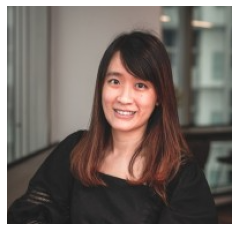

In [31]:
from keras.preprocessing.image import load_img
plt.rcParams["axes.grid"] = False
plt.axis('off')

img = load_img('../input/testsample/test.PNG')
imgplot = plt.imshow(img)
plt.show()

In [32]:
import_and_predict(img)

Pred = Sad
Feeling Blue? Laughter's the best medicine


,Title,Release Year,Rating,Director,Genre,Synopsis
5,Joker,2019,8.5,Shirish Kunder,"Comedies, International Movies, Music & Musicals",A remote village situated neither in India or Pakistan becomes its own republic after inmates at the local mental asylum bust loose and take over.
8,3 Idiots,2009,8.5,Rajkumar Hirani,"Comedies, Dramas, International Movies","While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."
9,Andhadhun,2018,8.5,Sriram Raghavan,"Comedies, Dramas, International Movies",A visually impaired pianist’s world careens into a series of shocking twists after he unintentionally lands at the murder scene of a former film star.
14,Queen,2013,8.4,Vikas Bahl,"Comedies, Dramas, International Movies","Dumped by her fiancé, a sheltered young woman decides to go on her honeymoon to Europe alone, embarking on an exhilarating journey of self-discovery."
15,Hera Pheri,2000,8.4,Prakash Mehra,"Action & Adventure, Comedies, Dramas",The bond between two crooks and best friends is threatened when one learns that the other's father had a hand in his own tragic past.
17,Gol Maal,1979,8.5,Hrishikesh Mukherjee,"Classic Movies, Comedies, International Movies","When circumstances at work compel Ram to pretend to have a twin, his lie works – until the boss wants his daughter to marry Ram’s fictitious brother."
18,Kabhi Haan Kabhi Naa,1994,8.5,Kundan Shah,"Comedies, Dramas, International Movies",A dreamer falls for a girl who is in love with someone else and tries to create a rift between her and the man she loves.
23,Zindagi Na Milegi Dobara,2011,8.3,Zoya Akhtar,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bachelor party in Spain learn some lessons about themselves and each other that will change them forever.
28,Andaz Apna Apna,1994,8.3,Rajkumar Santoshi,"Action & Adventure, Comedies, Cult Movies","Broke and with no concrete plans for the future, two young men discover that a stunning heiress lives nearby and try to charm her into marriage."
34,Dil Chahta Hai,2001,8.2,Farhan Akhtar,"Comedies, Dramas, International Movies","Inseparable childhood friends Akash, Sameer and Siddharth are just out of college. Nothing comes between them – until they each fall in love."


# Test Predictions

Creating a code to measure confidence level

In [33]:
def diagnosis(image_data):
    
#         size = (150,150)    
#         image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
#         image = np.asarray(image)
#         img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         img_resize = (cv2.resize(image_data, dsize=(48, 48),interpolation=cv2.INTER_CUBIC))/255.
    
#         img = cv2.imread('/home/img/python.png')
#         img_reshape = img_resize[np.newaxis,...]
        image = np.array(image_data)
        resized = cv2.resize(image, (48,48),interpolation=cv2.INTER_AREA)[np.newaxis]/255.   
        
    
        #predictions
        pred = model.predict(resized)*100
        label = np.argmax(pred, axis=-1)
        
        confusion = pd.DataFrame(data=pred, index=["Confidence in %"], columns=['Angry', 'Disgust','Fear','Happy','Neutral','Sad','Surprise']).T
        confusion = confusion.sort_values(axis=0,by='Confidence in %',ascending=False)
        return confusion

Angry

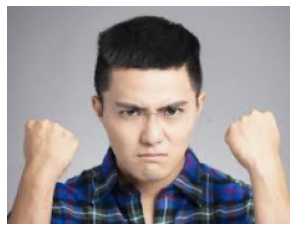

Pred = Sad
Feeling Blue? Laughter's the best medicine


,Title,Release Year,Rating,Director,Genre,Synopsis
5,Joker,2019,8.5,Shirish Kunder,"Comedies, International Movies, Music & Musicals",A remote village situated neither in India or Pakistan becomes its own republic after inmates at the local mental asylum bust loose and take over.
8,3 Idiots,2009,8.5,Rajkumar Hirani,"Comedies, Dramas, International Movies","While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."
9,Andhadhun,2018,8.5,Sriram Raghavan,"Comedies, Dramas, International Movies",A visually impaired pianist’s world careens into a series of shocking twists after he unintentionally lands at the murder scene of a former film star.
14,Queen,2013,8.4,Vikas Bahl,"Comedies, Dramas, International Movies","Dumped by her fiancé, a sheltered young woman decides to go on her honeymoon to Europe alone, embarking on an exhilarating journey of self-discovery."
15,Hera Pheri,2000,8.4,Prakash Mehra,"Action & Adventure, Comedies, Dramas",The bond between two crooks and best friends is threatened when one learns that the other's father had a hand in his own tragic past.
17,Gol Maal,1979,8.5,Hrishikesh Mukherjee,"Classic Movies, Comedies, International Movies","When circumstances at work compel Ram to pretend to have a twin, his lie works – until the boss wants his daughter to marry Ram’s fictitious brother."
18,Kabhi Haan Kabhi Naa,1994,8.5,Kundan Shah,"Comedies, Dramas, International Movies",A dreamer falls for a girl who is in love with someone else and tries to create a rift between her and the man she loves.
23,Zindagi Na Milegi Dobara,2011,8.3,Zoya Akhtar,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bachelor party in Spain learn some lessons about themselves and each other that will change them forever.
28,Andaz Apna Apna,1994,8.3,Rajkumar Santoshi,"Action & Adventure, Comedies, Cult Movies","Broke and with no concrete plans for the future, two young men discover that a stunning heiress lives nearby and try to charm her into marriage."
34,Dil Chahta Hai,2001,8.2,Farhan Akhtar,"Comedies, Dramas, International Movies","Inseparable childhood friends Akash, Sameer and Siddharth are just out of college. Nothing comes between them – until they each fall in love."


In [34]:
img = load_img('../input/samples/angrytest.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
import_and_predict(img)

In [35]:
diagnosis(img)

,Confidence in %
Sad,70.343903
Fear,16.360632
Angry,3.933199
Neutral,3.603221
Surprise,3.152980
Happy,2.435313
Disgust,0.170748


Disgust

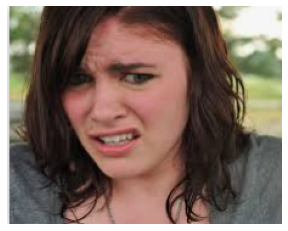

Pred = Happy
Feeling Happy? Keep up the heart rate with some Action titles!


,Title,Release Year,Rating,Director,Genre,Synopsis
0,Waar,2013,9.0,Bilal Lashari,"Action & Adventure, International Movies","When Pakistani authorities learn of a looming terrorist strike, they ask a retired intelligence officer to counter the attack before it's too late."
1,Inception,2010,8.7,Christopher Nolan,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man runs an espionage business built around entering the subconscious of his targets to mold their thoughts."
6,Avengers: Infinity War,2018,8.5,"Anthony Russo, Joe Russo","Action & Adventure, Sci-Fi & Fantasy",Superheroes amass to stop intergalactic sociopath Thanos from acquiring a full set of Infinity Stones and wiping out half of all life in the universe.
10,Django Unchained,2012,8.4,Quentin Tarantino,"Action & Adventure, Dramas","Accompanied by a German bounty hunter, a freed slave named Django travels across America to free his wife from a sadistic plantation owner."
12,Mersal,2017,8.5,Atlee Kumar,"Action & Adventure, Dramas, International Movies","A detective arrests a doctor for crimes targeting medical professionals but later finds the real culprit in a tale of revenge, corruption and magic."
15,Hera Pheri,2000,8.4,Prakash Mehra,"Action & Adventure, Comedies, Dramas",The bond between two crooks and best friends is threatened when one learns that the other's father had a hand in his own tragic past.
19,Paan Singh Tomar,2012,8.4,Tigmanshu Dhulia,"Action & Adventure, Dramas, International Movies",Paan Singh Tomar goes from celebrated runner to star brigand and rebel when life after sports fails to unfold as planned.
22,A Wednesday,2008,8.3,Neeraj Pandey,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb, a police commissioner must negotiate with the terrorist, who demands the release of four militants."
28,Andaz Apna Apna,1994,8.3,Rajkumar Santoshi,"Action & Adventure, Comedies, Cult Movies","Broke and with no concrete plans for the future, two young men discover that a stunning heiress lives nearby and try to charm her into marriage."
38,Black,2005,8.2,Raja Chanda,"Action & Adventure, International Movies","A small-town man takes on a dangerous gangster to avenge his father, a police officer who ended his own life after being framed in a deadly crime."


In [36]:
img = load_img('../input/samples/disgusttest.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
import_and_predict(img)

In [37]:
diagnosis(img)

,Confidence in %
Happy,76.878944
Sad,10.144404
Angry,7.130012
Fear,2.905592
Neutral,1.761258
Surprise,0.888587
Disgust,0.291187


Happy

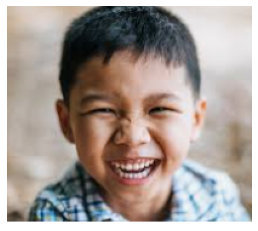

Pred = Happy
Feeling Happy? Keep up the heart rate with some Action titles!


,Title,Release Year,Rating,Director,Genre,Synopsis
0,Waar,2013,9.0,Bilal Lashari,"Action & Adventure, International Movies","When Pakistani authorities learn of a looming terrorist strike, they ask a retired intelligence officer to counter the attack before it's too late."
1,Inception,2010,8.7,Christopher Nolan,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man runs an espionage business built around entering the subconscious of his targets to mold their thoughts."
6,Avengers: Infinity War,2018,8.5,"Anthony Russo, Joe Russo","Action & Adventure, Sci-Fi & Fantasy",Superheroes amass to stop intergalactic sociopath Thanos from acquiring a full set of Infinity Stones and wiping out half of all life in the universe.
10,Django Unchained,2012,8.4,Quentin Tarantino,"Action & Adventure, Dramas","Accompanied by a German bounty hunter, a freed slave named Django travels across America to free his wife from a sadistic plantation owner."
12,Mersal,2017,8.5,Atlee Kumar,"Action & Adventure, Dramas, International Movies","A detective arrests a doctor for crimes targeting medical professionals but later finds the real culprit in a tale of revenge, corruption and magic."
15,Hera Pheri,2000,8.4,Prakash Mehra,"Action & Adventure, Comedies, Dramas",The bond between two crooks and best friends is threatened when one learns that the other's father had a hand in his own tragic past.
19,Paan Singh Tomar,2012,8.4,Tigmanshu Dhulia,"Action & Adventure, Dramas, International Movies",Paan Singh Tomar goes from celebrated runner to star brigand and rebel when life after sports fails to unfold as planned.
22,A Wednesday,2008,8.3,Neeraj Pandey,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb, a police commissioner must negotiate with the terrorist, who demands the release of four militants."
28,Andaz Apna Apna,1994,8.3,Rajkumar Santoshi,"Action & Adventure, Comedies, Cult Movies","Broke and with no concrete plans for the future, two young men discover that a stunning heiress lives nearby and try to charm her into marriage."
38,Black,2005,8.2,Raja Chanda,"Action & Adventure, International Movies","A small-town man takes on a dangerous gangster to avenge his father, a police officer who ended his own life after being framed in a deadly crime."


In [38]:
img = load_img('../input/samples/happytest.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
import_and_predict(img)

In [39]:
diagnosis(img)

,Confidence in %
Happy,65.566040
Neutral,22.742756
Sad,6.518649
Angry,2.829490
Fear,1.807499
Surprise,0.436636
Disgust,0.098927


Neutral

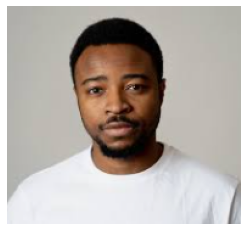

Pred = Sad
Feeling Blue? Laughter's the best medicine


,Title,Release Year,Rating,Director,Genre,Synopsis
5,Joker,2019,8.5,Shirish Kunder,"Comedies, International Movies, Music & Musicals",A remote village situated neither in India or Pakistan becomes its own republic after inmates at the local mental asylum bust loose and take over.
8,3 Idiots,2009,8.5,Rajkumar Hirani,"Comedies, Dramas, International Movies","While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."
9,Andhadhun,2018,8.5,Sriram Raghavan,"Comedies, Dramas, International Movies",A visually impaired pianist’s world careens into a series of shocking twists after he unintentionally lands at the murder scene of a former film star.
14,Queen,2013,8.4,Vikas Bahl,"Comedies, Dramas, International Movies","Dumped by her fiancé, a sheltered young woman decides to go on her honeymoon to Europe alone, embarking on an exhilarating journey of self-discovery."
15,Hera Pheri,2000,8.4,Prakash Mehra,"Action & Adventure, Comedies, Dramas",The bond between two crooks and best friends is threatened when one learns that the other's father had a hand in his own tragic past.
17,Gol Maal,1979,8.5,Hrishikesh Mukherjee,"Classic Movies, Comedies, International Movies","When circumstances at work compel Ram to pretend to have a twin, his lie works – until the boss wants his daughter to marry Ram’s fictitious brother."
18,Kabhi Haan Kabhi Naa,1994,8.5,Kundan Shah,"Comedies, Dramas, International Movies",A dreamer falls for a girl who is in love with someone else and tries to create a rift between her and the man she loves.
23,Zindagi Na Milegi Dobara,2011,8.3,Zoya Akhtar,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bachelor party in Spain learn some lessons about themselves and each other that will change them forever.
28,Andaz Apna Apna,1994,8.3,Rajkumar Santoshi,"Action & Adventure, Comedies, Cult Movies","Broke and with no concrete plans for the future, two young men discover that a stunning heiress lives nearby and try to charm her into marriage."
34,Dil Chahta Hai,2001,8.2,Farhan Akhtar,"Comedies, Dramas, International Movies","Inseparable childhood friends Akash, Sameer and Siddharth are just out of college. Nothing comes between them – until they each fall in love."


In [40]:
img = load_img('../input/samples/neutraltest.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
import_and_predict(img)

In [41]:
diagnosis(img)

,Confidence in %
Sad,42.264317
Fear,24.910568
Happy,15.822083
Surprise,10.315362
Neutral,3.490999
Angry,3.025092
Disgust,0.171575


Sad

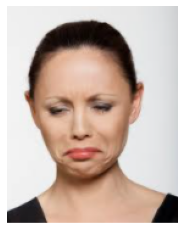

Pred = Neutral
Feeling Bored? Get fascinated with other-worldly Sci-Fi and Fantasy shows!


,Title,Release Year,Rating,Director,Genre,Synopsis
1,Inception,2010,8.7,Christopher Nolan,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man runs an espionage business built around entering the subconscious of his targets to mold their thoughts."
6,Avengers: Infinity War,2018,8.5,"Anthony Russo, Joe Russo","Action & Adventure, Sci-Fi & Fantasy",Superheroes amass to stop intergalactic sociopath Thanos from acquiring a full set of Infinity Stones and wiping out half of all life in the universe.
56,Star Trek,2009,8.0,NaN,"Classic & Cult TV, TV Action & Adventure, TV Sci-Fi & Fantasy","Led by unflappable Capt. Kirk, the crew of the starship Enterprise delves deep into the far reaches of space to explore new worlds and civilizations."
58,Thor: Ragnarok,2017,8.0,Taika Waititi,"Action & Adventure, Comedies, Sci-Fi & Fantasy","To save Asgard from a bloodthirsty goddess of death, the mighty Thor will have to battle his way to freedom and find a way back home."
68,District 9,2009,7.9,Neill Blomkamp,"Action & Adventure, International Movies, Sci-Fi & Fantasy","After years of segregation and forced labor, a race of stranded aliens enlists in a resistance movement spearheaded by a rogue government agent."
71,Moon,2009,7.9,Duncan Jones,"Dramas, Independent Movies, Sci-Fi & Fantasy","As he nears the end of a lonely three-year stint on the moon base Sarang, astronaut Sam Bell begins to hear and see strange things."
82,Freaks,1932,7.9,"Adam B. Stein, Zach Lipovsky","Independent Movies, Sci-Fi & Fantasy, Thrillers","Hidden away by her eccentric father, a mysterious young girl uncovers frightening truths when she starts to make contact with the outside world."
150,Equilibrium,2002,7.6,Kurt Wimmer,"Action & Adventure, Dramas, Sci-Fi & Fantasy","In a dystopian future, a totalitarian regime maintains peace by subduing the populace with a drug, and displays of emotion are punishable by death."
164,Bhavesh Joshi Superhero,2018,7.9,Vikramaditya Motwane,"Dramas, International Movies, Sci-Fi & Fantasy","When his best friend is killed for uncovering political corruption, an idealistic young man decides to become a masked fighter for justice."
257,Black Panther,2018,7.3,Ryan Coogler,"Action & Adventure, Sci-Fi & Fantasy","T'Challa, the superpowered new leader of the hidden, highly advanced African nation of Wakanda, strives to protect his home from enemies old and new."


In [42]:
img = load_img('../input/samples/sadtest.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
import_and_predict(img)

In [43]:
diagnosis(img)

,Confidence in %
Neutral,56.533497
Happy,38.779160
Sad,2.903698
Fear,0.866882
Angry,0.605360
Surprise,0.289799
Disgust,0.021610


Scared

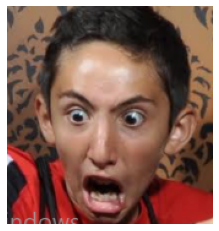

Pred = Angry
Feeling Angry? Get distracted with some of Netflix's Classics


,Title,Release Year,Rating,Director,Genre,Synopsis
2,Pulp Fiction,1994,8.7,Quentin Tarantino,"Classic Movies, Cult Movies, Dramas","This stylized crime caper weaves together stories featuring a burger-loving hit man, his philosophical partner and a washed-up boxer."
3,Schindler's List,1993,8.7,Steven Spielberg,"Classic Movies, Dramas","Oskar Schindler becomes an unlikely humanitarian, spending his entire fortune to help save 1,100 Jews from Auschwitz during World War II."
17,Gol Maal,1979,8.5,Hrishikesh Mukherjee,"Classic Movies, Comedies, International Movies","When circumstances at work compel Ram to pretend to have a twin, his lie works – until the boss wants his daughter to marry Ram’s fictitious brother."
32,Taxi Driver,1976,8.2,Martin Scorsese,"Classic Movies, Dramas, Thrillers","Enraged by New York's moral rot and urban decay, an unhinged cab driver goes mad, plotting an assassination and saving a teen sex worker."
35,Chupke Chupke,1975,8.4,Hrishikesh Mukherjee,"Classic Movies, Comedies, International Movies","Jealous of the high regard in which his new wife holds their brother-in-law, a botany professor stages an elaborate prank that will even the score."
42,Rocky,1976,8.1,John G. Avildsen,"Action & Adventure, Classic Movies, Dramas","Sylvester Stallone shot to fame as Rocky Balboa, an unknown fighter who's given a shot at fighting world champ Apollo Creed as a publicity stunt."
44,Platoon,1986,8.1,Oliver Stone,"Action & Adventure, Classic Movies, Dramas",A soldier grows disillusioned as he's caught between rival sergeants in this semi-autobiographical Vietnam War drama from writer-director Oliver Stone.
118,Philadelphia,1993,7.7,Jonathan Demme,"Classic Movies, Dramas, LGBTQ Movies",Philadelphia attorney Andrew Beckett launches a wrongful termination suit against his law firm when they fire him because he's gay and HIV-positive.
157,Lolita,1962,7.6,Stanley Kubrick,"Classic Movies, Dramas, Romantic Movies","In this black comedy, an English professor marries his landlady to get closer to his forbidden obsession: her teenage daughter."
171,Bawarchi,1972,8.1,Hrishikesh Mukherjee,"Classic Movies, Comedies, Dramas",A dysfunctional middle-class family is transformed by the attentions of their talented new chef – until he vanishes along with their valuable jewels.


In [44]:
img = load_img('../input/samples/scaredtest.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
import_and_predict(img)

In [45]:
diagnosis(img)

,Confidence in %
Angry,76.887878
Fear,7.990891
Happy,4.419601
Neutral,4.016632
Surprise,3.572891
Sad,2.255255
Disgust,0.856850


Surprised

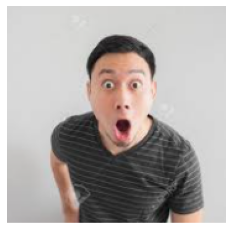

Pred = Happy
Feeling Happy? Keep up the heart rate with some Action titles!


,Title,Release Year,Rating,Director,Genre,Synopsis
0,Waar,2013,9.0,Bilal Lashari,"Action & Adventure, International Movies","When Pakistani authorities learn of a looming terrorist strike, they ask a retired intelligence officer to counter the attack before it's too late."
1,Inception,2010,8.7,Christopher Nolan,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man runs an espionage business built around entering the subconscious of his targets to mold their thoughts."
6,Avengers: Infinity War,2018,8.5,"Anthony Russo, Joe Russo","Action & Adventure, Sci-Fi & Fantasy",Superheroes amass to stop intergalactic sociopath Thanos from acquiring a full set of Infinity Stones and wiping out half of all life in the universe.
10,Django Unchained,2012,8.4,Quentin Tarantino,"Action & Adventure, Dramas","Accompanied by a German bounty hunter, a freed slave named Django travels across America to free his wife from a sadistic plantation owner."
12,Mersal,2017,8.5,Atlee Kumar,"Action & Adventure, Dramas, International Movies","A detective arrests a doctor for crimes targeting medical professionals but later finds the real culprit in a tale of revenge, corruption and magic."
15,Hera Pheri,2000,8.4,Prakash Mehra,"Action & Adventure, Comedies, Dramas",The bond between two crooks and best friends is threatened when one learns that the other's father had a hand in his own tragic past.
19,Paan Singh Tomar,2012,8.4,Tigmanshu Dhulia,"Action & Adventure, Dramas, International Movies",Paan Singh Tomar goes from celebrated runner to star brigand and rebel when life after sports fails to unfold as planned.
22,A Wednesday,2008,8.3,Neeraj Pandey,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb, a police commissioner must negotiate with the terrorist, who demands the release of four militants."
28,Andaz Apna Apna,1994,8.3,Rajkumar Santoshi,"Action & Adventure, Comedies, Cult Movies","Broke and with no concrete plans for the future, two young men discover that a stunning heiress lives nearby and try to charm her into marriage."
38,Black,2005,8.2,Raja Chanda,"Action & Adventure, International Movies","A small-town man takes on a dangerous gangster to avenge his father, a police officer who ended his own life after being framed in a deadly crime."


In [46]:
img = load_img('../input/samples/surprisedtest.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
import_and_predict(img)

In [47]:
diagnosis(img)

,Confidence in %
Happy,40.702583
Sad,31.232410
Fear,18.305965
Surprise,5.538969
Neutral,3.042395
Angry,1.066807
Disgust,0.110875
